# Project: Wrangling and Analyze Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import requests
import json

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [2]:
WeRateDogs_Archive_df = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
WeRateDogs_Archive_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [4]:
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)
with open('image-predictions.tsv', mode ='wb') as file:
    file.write(response.content)
Image_Prediction_df = pd.read_csv('image-predictions.tsv', sep='\t' )

In [5]:
Image_Prediction_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

**The cell below is copied from the supporting materials (do not run)**

In [ ]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_1.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

In [13]:
# source : https://stackoverflow.com/questions/41631873/how-to-read-json-txt-and-parse-json-python-read-txt-python/41632017
df_list = []
with open('tweet-json.txt') as f:
    for line in f:
        df_list.append(json.loads(line))

Tweet_Info_df= pd.DataFrame(df_list, columns = ['id', 'retweet_count', 'favorite_count'])

In [14]:
Tweet_Info_df.head()

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



First : visual assessement 

In [8]:
WeRateDogs_Archive_df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [9]:
WeRateDogs_Archive_df.sample(50)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2170,669351434509529089,NaN,NaN,2015-11-25 03:06:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sully. He's a Leviticus Galapagos. Ver...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669351434...,10,10,Sully,None,None,None,None
2167,669359674819481600,NaN,NaN,2015-11-25 03:39:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Saydee. She's a Rochester Ecclesiastical...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669359674...,11,10,Saydee,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None
559,803276597545603072,NaN,NaN,2016-11-28 16:37:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Winston. His selfie game is legendary....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/803276597...,11,10,Winston,None,None,None,None
1542,689599056876867584,NaN,NaN,2016-01-20 00:03:21 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we see 33 dogs posing for a picture. All ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/689599056...,11,10,None,None,None,None,None
2095,670764103623966721,NaN,NaN,2015-11-29 00:39:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Vincent. He's a wild Adderall Cayenne. Sh...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670764103...,10,10,Vincent,None,None,None,None
2023,671896809300709376,NaN,NaN,2015-12-02 03:40:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Lola. She fell asleep on a piece of pi...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671896809...,10,10,Lola,None,None,None,None
708,785264754247995392,NaN,NaN,2016-10-09 23:44:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Doc. He requested to be carried around...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/785264754...,12,10,Doc,None,None,None,None
994,748568946752774144,NaN,NaN,2016-06-30 17:28:39 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cora. She rings a bell for treats. 12/...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/748568946...,12,10,Cora,None,None,None,None
1417,698549713696649216,NaN,NaN,2016-02-13 16:50:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Claude. He's trying to be seductive bu...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/698549713...,9,10,Claude,None,None,None,None


In [10]:
Image_Prediction_df

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [11]:
Image_Prediction_df.sample(50)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
108,667878741721415682,https://pbs.twimg.com/media/CUTILFiWcAE8Rle.jpg,1,seat_belt,0.200373,False,miniature_pinscher,0.106003,True,schipperke,0.104733,True
1643,808001312164028416,https://pbs.twimg.com/media/CzaY5UdUoAAC91S.jpg,1,Labrador_retriever,0.730959,True,Staffordshire_bullterrier,0.130726,True,American_Staffordshire_terrier,0.028853,True
1324,756939218950160384,https://pbs.twimg.com/media/CoEwMXeWEAAaIz5.jpg,1,golden_retriever,0.790371,True,cocker_spaniel,0.130268,True,Labrador_retriever,0.064629,True
313,671561002136281088,https://pbs.twimg.com/media/CVHdK-7WwAAsuyc.jpg,1,Gordon_setter,0.469373,True,black-and-tan_coonhound,0.270893,True,Rottweiler,0.153233,True
1728,820690176645140481,https://pbs.twimg.com/media/C2OtWr0VQAEnS9r.jpg,2,West_Highland_white_terrier,0.872064,True,kuvasz,0.059526,True,Samoyed,0.037400,True
686,684097758874210310,https://pbs.twimg.com/media/CX5nR5oWsAAiclh.jpg,1,Labrador_retriever,0.627856,True,German_short-haired_pointer,0.173675,True,Chesapeake_Bay_retriever,0.041342,True
1563,793601777308463104,https://pbs.twimg.com/media/CwNwmxvXEAEJ54Z.jpg,1,miniature_pinscher,0.538981,True,Chihuahua,0.217830,True,toy_terrier,0.089149,True
206,669926384437997569,https://pbs.twimg.com/media/CUwOfnDWcAIXryP.jpg,1,Pomeranian,0.984231,True,keeshond,0.010231,True,papillon,0.002219,True
1529,789268448748703744,https://pbs.twimg.com/media/CvQLdotWcAAZn86.jpg,1,malamute,0.812860,True,Siberian_husky,0.120853,True,Eskimo_dog,0.024269,True
1300,752660715232722944,https://pbs.twimg.com/media/CnH87L6XYAAF7I_.jpg,2,goose,0.339324,False,English_setter,0.050512,True,basset,0.049093,True


In [15]:
Tweet_Info_df

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
...,...,...,...
2349,666049248165822465,41,111
2350,666044226329800704,147,311
2351,666033412701032449,47,128
2352,666029285002620928,48,132


In [16]:
Tweet_Info_df.sample(50)

,id,retweet_count,favorite_count
707,785264754247995392,1911,8128
1426,697616773278015490,1144,3467
1289,708119489313951744,1102,2937
1269,709409458133323776,788,2855
1799,676957860086095872,907,2395
2244,667878741721415682,127,409
98,872967104147763200,5669,28031
27,886680336477933568,4610,22798
644,793165685325201412,3238,10478
944,752568224206688256,2605,6140


Second : programmatic assessement 

In [17]:
WeRateDogs_Archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [18]:
Image_Prediction_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [19]:
Tweet_Info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [20]:
WeRateDogs_Archive_df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [21]:
Image_Prediction_df.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [22]:
Tweet_Info_df.describe()

,id,retweet_count,favorite_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


In [24]:
WeRateDogs_Archive_df.name.value_counts()

None       745
a           55
Charlie     12
Lucy        11
Oliver      11
          ... 
Alfy         1
Peanut       1
Vixen        1
Vince        1
Sweets       1
Name: name, Length: 957, dtype: int64

### Quality issues
**WeRateDogs_Archive_df Table:**

1. Invalid tweet_id data type

2. Invalid timestamp data type

3. Invalid dog names (None, a)

4. There are 181 retweets and 78 replies

5. Some numerators are less than 10 

6. Some denominators have 0 value


**Image_Prediction_df Table:**

7. Invalid tweet_id data type.

8. Some of (P1, P2 and P3) names start with uppercase and others with lowercase
**Tweet_Info_df Table:**

9. Wrong column name id

10. Invalid id data type.

### Tidiness issues
1. There are 4 columns for the dog stage

2. All the 3 tables are related

3. Timestamp have more than one value

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [25]:
# Make copies of original pieces of data
WeRateDogs_Archive_df_clean = WeRateDogs_Archive_df.copy() 
Image_Prediction_df_clean = Image_Prediction_df.copy() 
Tweet_Info_df_clean = Tweet_Info_df.copy() 

**Names and data type issues**

### Issue #1:Wrong column name id (Tweet_Info_df Table)

#### Define
Rename the id to tweet_id to make the merge easier

#### Code

In [26]:
Tweet_Info_df_clean = Tweet_Info_df_clean.rename(columns={'id': 'tweet_id'})

#### Test

In [27]:
Tweet_Info_df_clean.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


### Issue #2: Invalid timestamp data type (WeRateDogs_Archive_df Table)

#### Define
convert timestamp data type from string to date

#### Code

In [28]:
#Source : https://stackoverflow.com/questions/38333954/converting-object-to-datetime-format-in-python
WeRateDogs_Archive_df_clean['timestamp'] = pd.to_datetime(WeRateDogs_Archive_df_clean['timestamp'])

#### Test

In [29]:
WeRateDogs_Archive_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   int64              
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   object             
 5   text                        2356 non-null   object             
 6   retweeted_status_id         181 non-null    float64            
 7   retweeted_status_user_id    181 non-null    float64            
 8   retweeted_status_timestamp  181 non-null    object             
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2356 non-null   int64           

**Tidiness issues**

### Issue #3: There are 4 columns for the dog stage

#### Define
Create a new column name dog stage to contain the four values (doggo, floofer, pupper and puppo) then remove these columns from the table

#### Code

In [30]:
WeRateDogs_Archive_df_clean['doggo'] = WeRateDogs_Archive_df_clean['doggo'].str.replace('None','')
WeRateDogs_Archive_df_clean['floofer'] = WeRateDogs_Archive_df_clean['floofer'].str.replace('None','')
WeRateDogs_Archive_df_clean['pupper'] = WeRateDogs_Archive_df_clean['pupper'].str.replace('None','')
WeRateDogs_Archive_df_clean['puppo'] = WeRateDogs_Archive_df_clean['puppo'].str.replace('None','')

In [31]:
WeRateDogs_Archive_df_clean['dog_stage'] = WeRateDogs_Archive_df_clean.doggo + WeRateDogs_Archive_df_clean.floofer + WeRateDogs_Archive_df_clean.pupper + WeRateDogs_Archive_df_clean.puppo

In [32]:
WeRateDogs_Archive_df_clean = WeRateDogs_Archive_df_clean.drop(columns = ['doggo' , 'floofer' , 'pupper' , 'puppo' ])

In [33]:
# remove doggopupper
WeRateDogs_Archive_df_clean.drop(WeRateDogs_Archive_df_clean.index[WeRateDogs_Archive_df_clean['dog_stage']== 'doggopupper'], inplace = True)

#### Test

In [34]:
WeRateDogs_Archive_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2344 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2344 non-null   int64              
 1   in_reply_to_status_id       77 non-null     float64            
 2   in_reply_to_user_id         77 non-null     float64            
 3   timestamp                   2344 non-null   datetime64[ns, UTC]
 4   source                      2344 non-null   object             
 5   text                        2344 non-null   object             
 6   retweeted_status_id         179 non-null    float64            
 7   retweeted_status_user_id    179 non-null    float64            
 8   retweeted_status_timestamp  179 non-null    object             
 9   expanded_urls               2285 non-null   object             
 10  rating_numerator            2344 non-null   int64           

### Issue #4:  Timestamp have more than one value

#### Define
Extract the year, month, day and hour from the timestamp

#### Code

In [50]:
#Source: https://pandas.pydata.org/docs/reference/api/pandas.DatetimeIndex.html
WeRateDogs_Archive_df_clean['year'] = pd.DatetimeIndex(WeRateDogs_Archive_df_clean['timestamp']).year
WeRateDogs_Archive_df_clean['month'] = pd.DatetimeIndex(WeRateDogs_Archive_df_clean['timestamp']).month
WeRateDogs_Archive_df_clean['day'] = pd.DatetimeIndex(WeRateDogs_Archive_df_clean['timestamp']).dayofweek
WeRateDogs_Archive_df_clean['hour'] = pd.DatetimeIndex(WeRateDogs_Archive_df_clean['timestamp']).hour

In [53]:
WeRateDogs_Archive_df_clean = WeRateDogs_Archive_df_clean.drop(columns = ['timestamp'])

#### Test

In [54]:
WeRateDogs_Archive_df_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,year,month,day,hour
0,892420643555336193,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,,2017,8,1,16
1,892177421306343426,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,,2017,8,1,0
2,891815181378084864,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,,2017,7,0,0
3,891689557279858688,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,,2017,7,6,15
4,891327558926688256,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,,2017,7,5,16


### Issue #5: All the 3 tables are related

#### Define
Merge the WeRateDogs_Archive_df , Image_Prediction_df and Tweet_Info_df  into one table, joining on tweet id.

#### Code

In [55]:

WeRateDogs_Archive_df_clean = pd.merge(WeRateDogs_Archive_df_clean, Image_Prediction_df,
                            on=['tweet_id'], how='left')
WeRateDogs_Archive_df_clean = pd.merge(WeRateDogs_Archive_df_clean, Tweet_Info_df_clean,
                            on=['tweet_id'], how='left')

#### Test

In [56]:
WeRateDogs_Archive_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2344 entries, 0 to 2343
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2344 non-null   int64  
 1   in_reply_to_status_id       77 non-null     float64
 2   in_reply_to_user_id         77 non-null     float64
 3   source                      2344 non-null   object 
 4   text                        2344 non-null   object 
 5   retweeted_status_id         179 non-null    float64
 6   retweeted_status_user_id    179 non-null    float64
 7   retweeted_status_timestamp  179 non-null    object 
 8   expanded_urls               2285 non-null   object 
 9   rating_numerator            2344 non-null   int64  
 10  rating_denominator          2344 non-null   int64  
 11  name                        2344 non-null   object 
 12  dog_stage                   2344 non-null   object 
 13  year                        2344 

**Qualty issues**

### Issue #6:  Invalid tweet id data type

#### Define
convert tweet id data type from int to string

#### Code

In [57]:
WeRateDogs_Archive_df_clean.tweet_id  = WeRateDogs_Archive_df_clean.tweet_id.astype(str)

#### Test

In [58]:
WeRateDogs_Archive_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2344 entries, 0 to 2343
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2344 non-null   object 
 1   in_reply_to_status_id       77 non-null     float64
 2   in_reply_to_user_id         77 non-null     float64
 3   source                      2344 non-null   object 
 4   text                        2344 non-null   object 
 5   retweeted_status_id         179 non-null    float64
 6   retweeted_status_user_id    179 non-null    float64
 7   retweeted_status_timestamp  179 non-null    object 
 8   expanded_urls               2285 non-null   object 
 9   rating_numerator            2344 non-null   int64  
 10  rating_denominator          2344 non-null   int64  
 11  name                        2344 non-null   object 
 12  dog_stage                   2344 non-null   object 
 13  year                        2344 

### Issue #7:  Invalid dog names (None, a)

#### Define
Remove all the invalid dog names

#### Code

In [59]:
# Source : https://stackoverflow.com/questions/18172851/deleting-dataframe-row-in-pandas-based-on-column-value
WeRateDogs_Archive_df_clean = WeRateDogs_Archive_df_clean[WeRateDogs_Archive_df_clean.name != 'a']
WeRateDogs_Archive_df_clean = WeRateDogs_Archive_df_clean[WeRateDogs_Archive_df_clean.name != 'None']

#### Test

In [60]:
WeRateDogs_Archive_df_clean.name.value_counts()

Charlie    12
Lucy       11
Oliver     11
Cooper     11
Penny      10
           ..
Vixen       1
Vince       1
Crimson     1
Clarq       1
Timofy      1
Name: name, Length: 952, dtype: int64

### Issue #8: Some of (P1, P2 and P3) names start with uppercase and others with lowercase

#### Define
convert lowercase letters to uppercase 

#### Code

In [61]:
#Source : https://www.geeksforgeeks.org/string-capitalize-python/
WeRateDogs_Archive_df_clean.p1 = WeRateDogs_Archive_df_clean.p1.str.capitalize()
WeRateDogs_Archive_df_clean.p2 = WeRateDogs_Archive_df_clean.p2.str.capitalize()
WeRateDogs_Archive_df_clean.p3 = WeRateDogs_Archive_df_clean.p3.str.capitalize()

#### Test

In [62]:
WeRateDogs_Archive_df_clean.p1

0                 Orange
1              Chihuahua
2              Chihuahua
3            Paper_towel
4                 Basset
              ...       
2321                  Ox
2323         Maltese_dog
2333    Golden_retriever
2334    Miniature_poodle
2337          Box_turtle
Name: p1, Length: 1550, dtype: object

In [63]:
WeRateDogs_Archive_df_clean.p2

0                    Bagel
1                 Pekinese
2                 Malamute
3       Labrador_retriever
4         English_springer
               ...        
2321          Newfoundland
2323            Toy_poodle
2333       Tibetan_mastiff
2334              Komondor
2337            Mud_turtle
Name: p2, Length: 1550, dtype: object

In [64]:
WeRateDogs_Archive_df_clean.p3

0                            Banana
1                          Papillon
2                            Kelpie
3                           Spatula
4       German_short-haired_pointer
                   ...             
2321                    Groenendael
2323               Miniature_poodle
2333             Labrador_retriever
2334    Soft-coated_wheaten_terrier
2337                       Terrapin
Name: p3, Length: 1550, dtype: object

### Issue #9: There are 181 retweets and 78 replies

#### Define:
Remove any retweets or reply from  We Rate Dog Archive table since we only need the original data 

#### Code

In [65]:
# Source : https://stackoverflow.com/questions/44869327/find-index-of-all-rows-with-null-values-in-a-particular-column-in-pandas-datafra
Retweet_Index = WeRateDogs_Archive_df_clean[~WeRateDogs_Archive_df_clean['retweeted_status_id'].isnull()].index
Reply_Index = WeRateDogs_Archive_df_clean[~WeRateDogs_Archive_df_clean['in_reply_to_status_id'].isnull()].index

In [66]:
WeRateDogs_Archive_df_clean.drop(index=Retweet_Index, inplace=True)
WeRateDogs_Archive_df_clean.drop(index=Reply_Index, inplace=True)

In [68]:
WeRateDogs_Archive_df_clean = WeRateDogs_Archive_df_clean.drop(columns = ['in_reply_to_status_id' , 'in_reply_to_user_id' , 'retweeted_status_id' , 'retweeted_status_user_id' ,'retweeted_status_timestamp'])

#### Test

In [69]:
WeRateDogs_Archive_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1434 entries, 0 to 2337
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1434 non-null   object 
 1   source              1434 non-null   object 
 2   text                1434 non-null   object 
 3   expanded_urls       1434 non-null   object 
 4   rating_numerator    1434 non-null   int64  
 5   rating_denominator  1434 non-null   int64  
 6   name                1434 non-null   object 
 7   dog_stage           1434 non-null   object 
 8   year                1434 non-null   int64  
 9   month               1434 non-null   int64  
 10  day                 1434 non-null   int64  
 11  hour                1434 non-null   int64  
 12  jpg_url             1387 non-null   object 
 13  img_num             1387 non-null   float64
 14  p1                  1387 non-null   object 
 15  p1_conf             1387 non-null   float64
 16  p1_dog

### Issue #10:  Some numerator less than 10

#### Define
Remove the data that have a numerator  less than 10

#### Code

In [70]:
WeRateDogs_Archive_df_clean.drop(WeRateDogs_Archive_df_clean.index[WeRateDogs_Archive_df_clean['rating_numerator'] < 10], inplace = True)

#### Test

In [71]:
WeRateDogs_Archive_df_clean[WeRateDogs_Archive_df_clean.rating_numerator < 10].count()[0]

0

### Issue #11:  Some denominator are equal to  0 

#### Define
Remove the data that have a denominator equal to 0

#### Code

In [72]:
WeRateDogs_Archive_df_clean.drop(WeRateDogs_Archive_df_clean.index[WeRateDogs_Archive_df_clean['rating_denominator'] == 0], inplace = True)

#### Test

In [73]:
WeRateDogs_Archive_df_clean[WeRateDogs_Archive_df_clean.rating_denominator ==0].count()[0]

0

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [74]:
WeRateDogs_Archive_df_clean.to_csv('twitter_archive_master.csv')

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [75]:
df = pd.read_csv('twitter_archive_master.csv')
df.head()

,Unnamed: 0,tweet_id,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,year,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,0,892420643555336193,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,2017,...,0.097049,False,Bagel,0.085851,False,Banana,0.076110,False,8853.0,39467.0
1,1,892177421306343426,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,2017,...,0.323581,True,Pekinese,0.090647,True,Papillon,0.068957,True,6514.0,33819.0
2,2,891815181378084864,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,2017,...,0.716012,True,Malamute,0.078253,True,Kelpie,0.031379,True,4328.0,25461.0
3,3,891689557279858688,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,2017,...,0.170278,False,Labrador_retriever,0.168086,True,Spatula,0.040836,False,8964.0,42908.0
4,4,891327558926688256,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,2017,...,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,9774.0,41048.0


**What is the dog stage that take the most retweet and favorite?**

In [76]:
df.groupby(['dog_stage'])[['retweet_count','favorite_count']].mean()

,retweet_count,favorite_count
dog_stage,,
doggo,5644.684211,18641.157895
floofer,2247.200000,9559.000000
pupper,2570.204082,8491.183673
puppo,3914.533333,13804.133333


**What is the most month have tweets?**

In [77]:
df.month.value_counts()

12    186
11    144
1     133
2     114
3     113
7      99
6      82
4      71
5      67
10     62
8      51
9      46
Name: month, dtype: int64

**What is the most popular dog names?**

In [78]:
df.name.value_counts()

Charlie       11
Lucy          10
Cooper         9
Oliver         9
Tucker         8
              ..
Clarkus        1
incredibly     1
Lance          1
Charles        1
Harnold        1
Name: name, Length: 810, dtype: int64

### Insights:
1. Doggo is the most stage that has both retweet and favorite

2. Most of the weRatedogs account tweets were published in December

3. The most popular names for dogs are first Charlie, then Lucy in second, and for third, both Cooper and Oliver

### Visualization

**What is the most popular stage in dogs?**

In [79]:
resualt = df.dog_stage.value_counts()
resualt

pupper     98
doggo      38
puppo      15
floofer     5
Name: dog_stage, dtype: int64

Text(0.5, 1.0, 'percentage of dog stage')

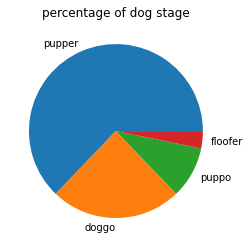

In [80]:
plt.pie(resualt ,  labels = ['pupper', 'doggo' , 'puppo' , 'floofer'])
plt.title('percentage of dog stage')

Pupper is the most popular dog stage.